In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from PIL import Image
from glob import glob
from random import choice

In [3]:
def gaussian2d(x,y,x0,y0,sigma):
    r2=(x-x0)**2+(y-y0)**2
    return exp(-r2/2/sigma**2)

def circle(x,y,x0,y0,r):
    r2=(x-x0)**2+(y-y0)**2
    return r2<r**2


from scipy.signal import convolve2d

def randbetween(low,high):
    return rand()*(high-low)+low


In [4]:
def deg2pixel(D):
    # the bbsk images are angular size 60 degrees x 40 degrees
    # the raw images are resized so that 
    #   5.5 pixels ~ 0.5 degrees (cat retina)  - default

    P=D/.5*5.5
    return P

def pixel2deg(P):
    D=P/5.5*0.5
    return D

In [5]:
def make_mask(fsig=35,g=None):
    # logged dog is 495 x 660 
    # the bbsk images are angular size 60 degrees x 40 degrees
    # the raw images are resized so that 
    #   5.5 pixels ~ 0.5 degrees (cat retina)  - default
    
    mx,my=660,495
    x,y=meshgrid(arange(mx),arange(my))
    
    if g is None:
        g=0


        blob_deg_min=3
        blob_deg_max=14
        for i in range(10):
            g=g+circle(x,y,rand()*mx,rand()*my,randbetween(deg2pixel(blob_deg_min),deg2pixel(blob_deg_max)))

        #    g=g+gaussian2d(x,y,rand()*mx,rand()*my,randbetween(deg2pixel(blob_deg_min),deg2pixel(blob_deg_max)))>.5
        g=g>0


    f=gaussian2d(x,y,mx//2,my//2,fsig)
    f=f[(my//2-200):(my//2+200),(mx//2-200):(mx//2+200)]

    #f=f[(my//2-3*fsig):(my//2+3*fsig),(mx//2-3*fsig):(mx//2+3*fsig)]
    
    res=convolve2d(g,f,mode='same')
    res=res/res.max()
    
    return res

In [8]:

#mx,my=1200,700
mx,my=660,495
x,y=meshgrid(arange(mx),arange(my))
g=0

blob_deg_min=3
blob_deg_max=14
for i in range(10):
    g=g+circle(x,y,rand()*mx,rand()*my,randbetween(deg2pixel(blob_deg_min),deg2pixel(blob_deg_max)))
    
#    g=g+gaussian2d(x,y,rand()*mx,rand()*my,randbetween(deg2pixel(blob_deg_min),deg2pixel(blob_deg_max)))>.5
g=g>0

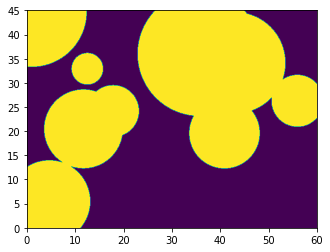

In [9]:
imshow(g,extent=[0,pixel2deg(mx),0,pixel2deg(my)])

In [10]:
fsig=20 # pixels
f=gaussian2d(x,y,mx//2,my//2,fsig)
#f=f[(my//2-3*fsig):(my//2+3*fsig),(mx//2-3*fsig):(mx//2+3*fsig)]
f=f[(my//2-200):(my//2+200),(mx//2-200):(mx//2+200)]



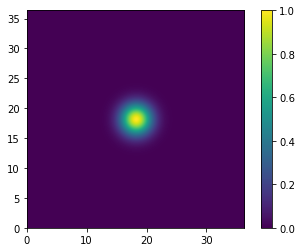

In [11]:
imshow(f,extent=[0,pixel2deg(f.shape[1]),0,pixel2deg(f.shape[0])])
colorbar()

In [12]:
%%time
res=convolve2d(g,f,mode='same')
res=res/res.max()

CPU times: user 1min 50s, sys: 410 ms, total: 1min 51s
Wall time: 1min 50s


In [13]:
pixel2deg(35)

3.1818181818181817

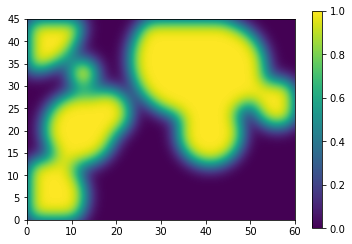

In [14]:
imshow(res,extent=[0,pixel2deg(res.shape[1]),0,pixel2deg(res.shape[0])])
colorbar()

Text(0.5, 1.0, '(495, 660, 4)')

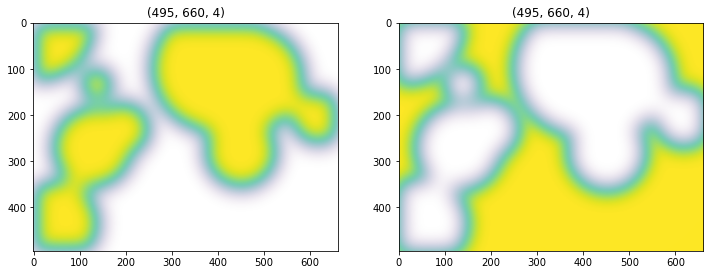

In [15]:
res=res[:495,:660]
figure(figsize=(12,8))
subplot(1,2,1)

AA=np.uint8(cm.viridis(res)*255)
AA[:,:,3]=res*255
im=Image.fromarray(AA)  
imshow(im)
title(AA.shape)

subplot(1,2,2)

FF=np.uint8(cm.viridis(1-res)*255)
FF[:,:,3]=(1-res)*255
im=Image.fromarray(FF)  
imshow(im)
title(FF.shape)



In [16]:
import process_images_hdf5 as pi5

In [17]:
fname='asdf/bbsk081604_all_log2dog.asdf'
image_data=pi5.asdf_load_images(fname)

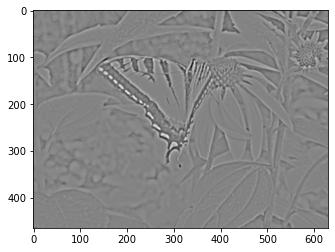

In [18]:
im1=image_data['im'][5]*image_data['im_scale_shift'][0]+image_data['im_scale_shift'][1]
imshow(im1,cmap=cm.gray)


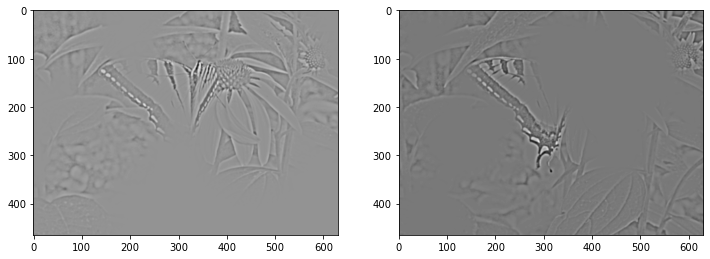

In [19]:
figure(figsize=(12,8))
subplot(1,2,1)

A=AA
r,c=0,0
alpha_A=A[(0+r):(im1.shape[0]+r),(0+c):(im1.shape[1]+c),3]/255
im2=im1*alpha_A
imshow(im2,cmap=cm.gray)


subplot(1,2,2)

F=FF
r,c=0,0
alpha_F=F[(0+r):(im1.shape[0]+r),(0+c):(im1.shape[1]+c),3]/255
im2=im1*alpha_F
imshow(im2,cmap=cm.gray)

In [20]:
from bigfonts import *
from IPython.display import HTML

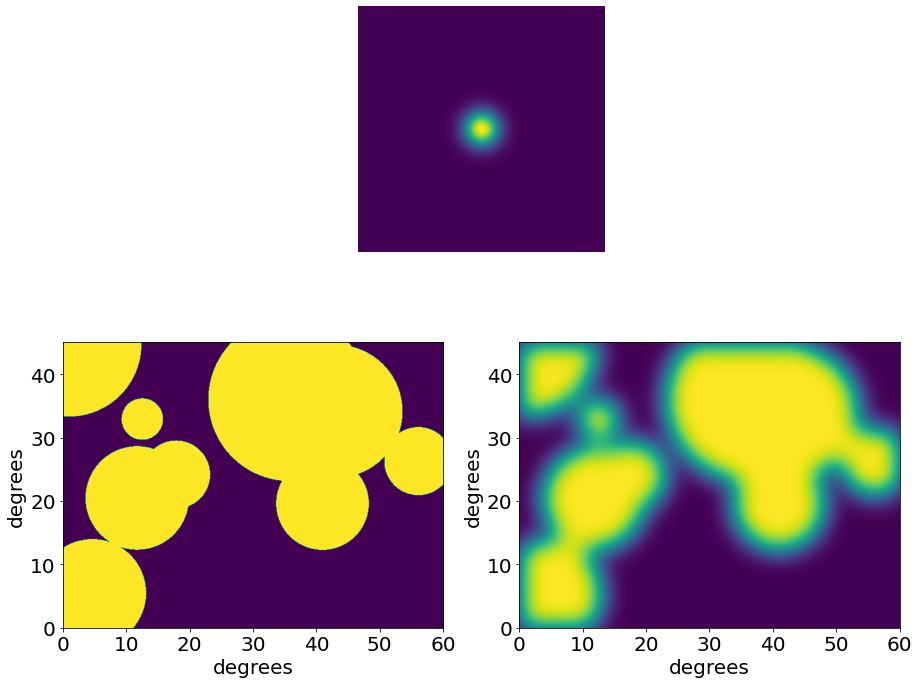

In [21]:
figure(figsize=(15,12))
subplot(2,3,2)
imshow(f,extent=[0,pixel2deg(f.shape[1]),0,pixel2deg(f.shape[0])])
axis('off')
subplot(2,2,3)
imshow(g,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
xlabel('degrees')
ylabel('degrees')

subplot(2,2,4)

imshow(res,extent=[0,pixel2deg(res.shape[1]),0,pixel2deg(res.shape[0])])
xlabel('degrees')
ylabel('degrees')

savefig('blob_convolution_example_fsig_%d.pdf' % fsig)


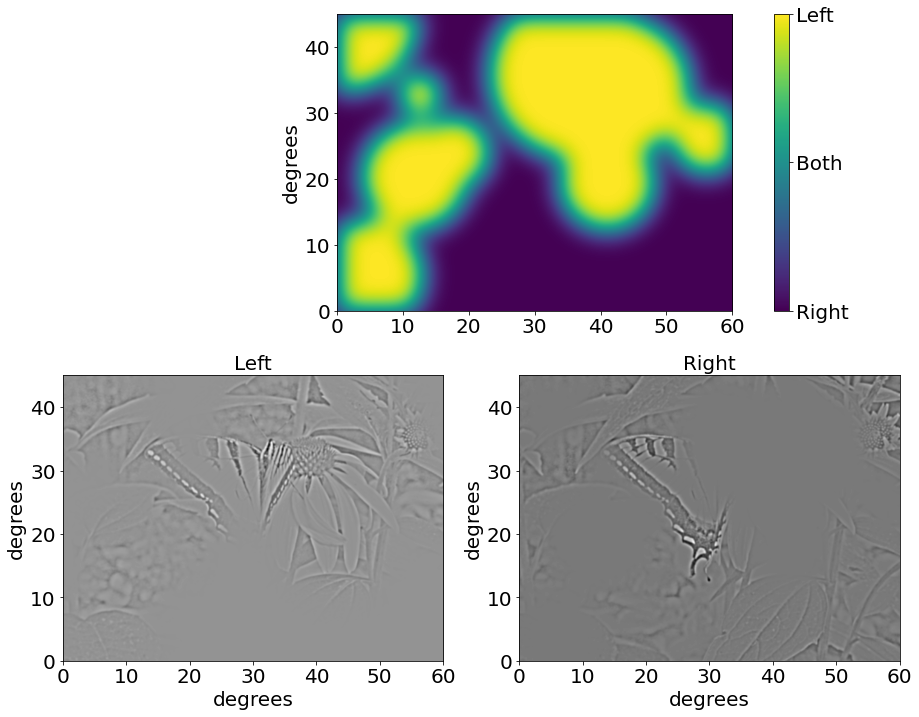

In [22]:
figure(figsize=(15,12))
subplot(2,1,1)
imshow(res,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
ylabel('degrees')
ax=colorbar()
rmin,rmax=res.min(),res.max()
ax.set_ticks([rmin,(rmin+rmax)/2,rmax])
ax.set_ticklabels(['Right','Both','Left'])

subplot(2,2,3)
im2=im1*alpha_A
imshow(im2,cmap=cm.gray,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
xlabel('degrees')
ylabel('degrees')
title('Left')

subplot(2,2,4)
im2=im1*alpha_F
imshow(im2,cmap=cm.gray,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
xlabel('degrees')
ylabel('degrees')
title('Right')

savefig('mask_filter_example_fsig_%d.pdf' % fsig)


In [2]:
masks={}
for f,fsig in enumerate([10,30,50,70,90,110]):
    res=make_mask(fsig,g)
    masks[fsig]=res

NameError: name 'make_mask' is not defined

In [1]:
fig, axs = plt.subplots(3, 2,figsize=(18,15))

for f,fsig in enumerate([10,30,50,70,90,110]):
    ax = axs.ravel()[f]

    res=masks[fsig]
    im=ax.imshow(res,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
    ax.set_ylabel('degrees')
    ax.set_title(r"$\sigma_f=%g$" % fsig)
    
    if fsig in [10,30,50,70]:
        ax.set_xticklabels([])
    
h=fig.colorbar(im, ax=axs)
rmin,rmax=res.min(),res.max()
h.set_ticks([rmin,(rmin+rmax)/2,rmax])
h.set_ticklabels(['Right','Both','Left'])
savefig('mask_filter_examples_fsigs.pdf')

NameError: name 'plt' is not defined

In [ ]:
raise ValueError

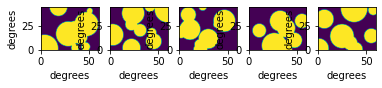

In [22]:
gs=[]
for k in range(5):
    g=0


    blob_deg_min=3
    blob_deg_max=14
    percentage_covered=0
    while percentage_covered<50:
        g=g+circle(x,y,rand()*mx,rand()*my,randbetween(deg2pixel(blob_deg_min),deg2pixel(blob_deg_max)))
        g=g>0
        percentage_covered=g.sum()/prod(g.shape)*100
    #    g=g+gaussian2d(x,y,rand()*mx,rand()*my,randbetween(deg2pixel(blob_deg_min),deg2pixel(blob_deg_max)))>.5

    gs.append(g)
    
    subplot(1,5,k+1)
    imshow(g,extent=[0,pixel2deg(mx),0,pixel2deg(my)])
    xlabel('degrees')
    ylabel('degrees')

In [23]:
g.sum()/prod(g.shape)*100

57.63391490664218

bblais-masks-20210615/2021-06-15-A-A-fsig10.png
bblais-masks-20210615/2021-06-15-A-F-fsig10.png
bblais-masks-20210615/2021-06-15-B-A-fsig10.png
bblais-masks-20210615/2021-06-15-B-F-fsig10.png
bblais-masks-20210615/2021-06-15-C-A-fsig10.png
bblais-masks-20210615/2021-06-15-C-F-fsig10.png
bblais-masks-20210615/2021-06-15-D-A-fsig10.png
bblais-masks-20210615/2021-06-15-D-F-fsig10.png
bblais-masks-20210615/2021-06-15-E-A-fsig10.png
bblais-masks-20210615/2021-06-15-E-F-fsig10.png
bblais-masks-20210615/2021-06-15-A-A-fsig30.png
bblais-masks-20210615/2021-06-15-A-F-fsig30.png
bblais-masks-20210615/2021-06-15-B-A-fsig30.png
bblais-masks-20210615/2021-06-15-B-F-fsig30.png
bblais-masks-20210615/2021-06-15-C-A-fsig30.png
bblais-masks-20210615/2021-06-15-C-F-fsig30.png
bblais-masks-20210615/2021-06-15-D-A-fsig30.png
bblais-masks-20210615/2021-06-15-D-F-fsig30.png
bblais-masks-20210615/2021-06-15-E-A-fsig30.png
bblais-masks-20210615/2021-06-15-E-F-fsig30.png
bblais-masks-20210615/2021-06-15-A-A-fsi

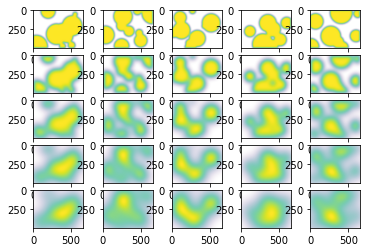

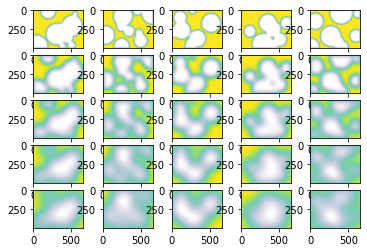

In [24]:
count=1
for f,fsig in enumerate([10,30,50,70,90]):
    for k in range(5):
        res=make_mask(fsig,gs[k])

        AA=np.uint8(cm.viridis(res)*255)
        AA[:,:,3]=res*255

        FF=np.uint8(cm.viridis(1-res)*255)
        FF[:,:,3]=(1-res)*255

        im=Image.fromarray(AA)    
        fname='bblais-masks-20210615/2021-06-15-%c-A-fsig%2d.png' % (k+65,fsig)
        im.save(fname)
        print(fname)

        figure(1)
        subplot(5,5,count)
        imshow(im)

        im=Image.fromarray(FF)    
        fname='bblais-masks-20210615/2021-06-15-%c-F-fsig%2d.png' % (k+65,fsig)
        im.save(fname)
        print(fname)

        figure(2)
        subplot(5,5,count)
        imshow(im)
    
        count+=1